In [33]:
%pip install --upgrade scikit-learn
%pip install --upgrade matplotlib
%pip install --upgrade scipy
%pip install --upgrade pandas
%pip install --upgrade numpy
%pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 8.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

In [112]:
data = loadarff('diabetes.arff')
#print(data)
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')

In [55]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [115]:
fimportance = f_classif(X, y)
f_scores, f_pvalues = fimportance
fdf = pd.DataFrame({
    'feature': X.columns,
    'f_score': f_scores,
    'p_value': f_pvalues
})

In [116]:
idx = fdf['f_score'].idxmin()
worst_feature = fdf['feature'][idx]
idx = fdf['f_score'].idxmax()
best_feature = fdf['feature'][idx]
print(worst_feature)
print(best_feature)

BloodPressure
Glucose


In [88]:
Exercício 1

SyntaxError: invalid syntax (3686294474.py, line 1)

<Axes: xlabel='Glucose', ylabel='Density'>

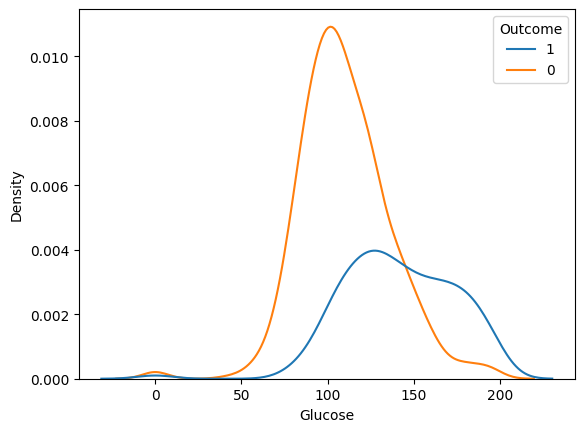

In [89]:
sns.kdeplot(data=df, x=best_feature, hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Density'>

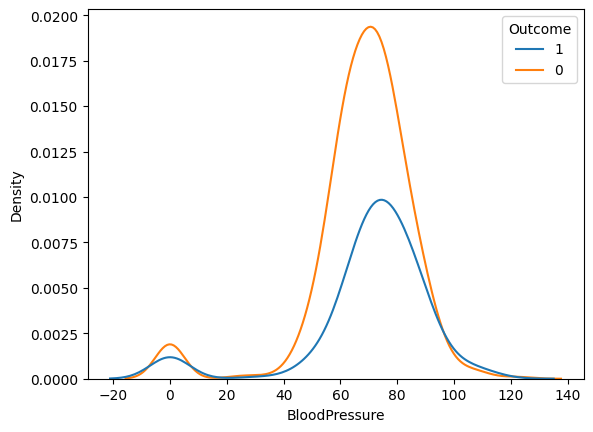

In [90]:
sns.kdeplot(data=df, x=worst_feature, hue='Outcome')

In [ ]:
Exercício 2

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
model = tree.DecisionTreeClassifier()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

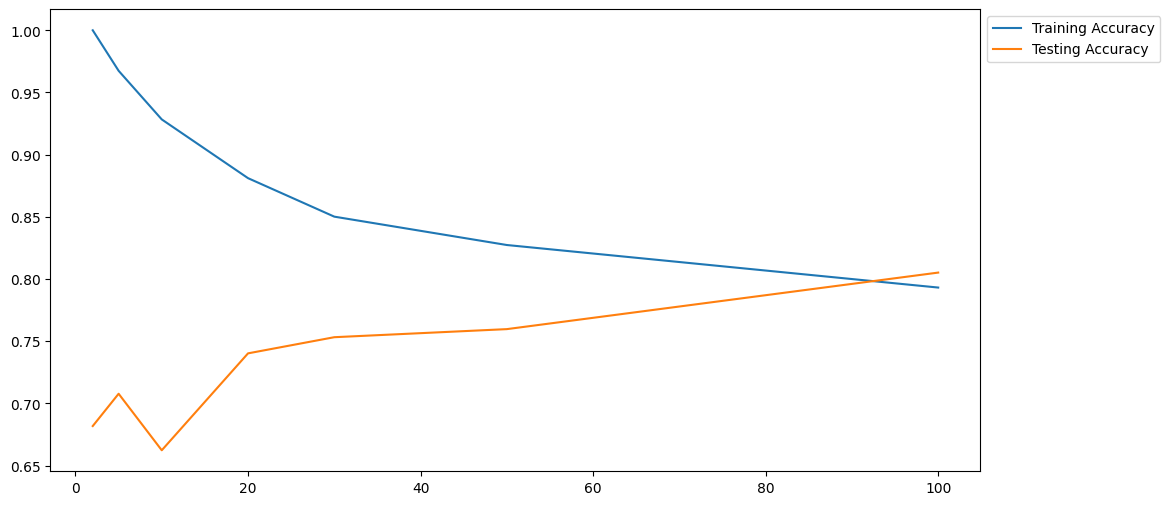

In [122]:
min_spl_param = [2, 5, 10, 20, 30, 50, 100]
accuracy_training = []
accuracy_testing = []

for param in min_spl_param:
    model = tree.DecisionTreeClassifier(min_samples_split=param)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    accuracy_training.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_testing.append(metrics.accuracy_score(y_test, y_test_pred))

adf = pd.DataFrame({
    "Min Sample Param": min_spl_param,
    "Accuracy Training": accuracy_training,
    "Accuracy Testing": accuracy_testing
})

plt.figure(figsize=(12, 6))
plt.plot(min_spl_param, accuracy_training, label='Training Accuracy')
plt.plot(min_spl_param, accuracy_testing, label='Testing Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [91]:
Exercício 3

SyntaxError: invalid syntax (1154457355.py, line 1)

In [ ]:
Exercício 4

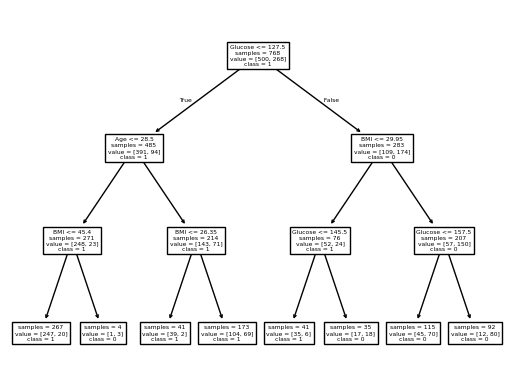

In [120]:
predictor = tree.DecisionTreeClassifier(max_depth=3)
predictor.fit(X, y)
tree.plot_tree(predictor, feature_names=X.columns, class_names=y, impurity=False)
plt.show()

In [108]:
*

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
['Outcome']
